In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
file_path = 'IPL.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Match City,Match Date,Teams,Venue,Player of Match,Team,Over,Batsman,Runs,Extras Type,Extras Total,Wicket Type,Player Out,Bowler,Winner,Opposing Team,Fielder
0,Bangalore,4/18/2008,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,BB McCullum,Kolkata Knight Riders,0,SC Ganguly,0,legbyes,1,NaN,NaN,P Kumar,Kolkata Knight Riders,Royal Challengers Bangalore,NaN
1,Bangalore,4/18/2008,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,BB McCullum,Kolkata Knight Riders,0,BB McCullum,0,NaN,0,NaN,NaN,P Kumar,Kolkata Knight Riders,Royal Challengers Bangalore,NaN
2,Bangalore,4/18/2008,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,BB McCullum,Kolkata Knight Riders,0,BB McCullum,0,wides,1,NaN,NaN,P Kumar,Kolkata Knight Riders,Royal Challengers Bangalore,NaN
3,Bangalore,4/18/2008,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,BB McCullum,Kolkata Knight Riders,0,BB McCullum,0,NaN,0,NaN,NaN,P Kumar,Kolkata Knight Riders,Royal Challengers Bangalore,NaN
4,Bangalore,4/18/2008,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,BB McCullum,Kolkata Knight Riders,0,BB McCullum,0,NaN,0,NaN,NaN,P Kumar,Kolkata Knight Riders,Royal Challengers Bangalore,NaN


In [3]:
# Define a function to calculate batting and bowling metrics
def calculate_metrics(df):
    # Batting metrics
    batting_metrics = df.groupby(['Match Date', 'Venue', 'Team', 'Opposing Team', 'Batsman']).agg(
        Runs_Scored=('Runs', 'sum'),
        Balls_Faced=('Batsman', 'count'),
        Dismissals=('Player Out', lambda x: x.notnull().sum())
    ).reset_index()

    # Calculate Batting Average and Strike Rate
    batting_metrics['Batting_Average'] = batting_metrics.apply(
        lambda x: x['Runs_Scored'] / x['Dismissals'] if x['Dismissals'] > 0 else x['Runs_Scored'],
        axis=1
    )
    batting_metrics['Strike_Rate'] = (batting_metrics['Runs_Scored'] / batting_metrics['Balls_Faced']) * 100

    # Bowling metrics
    bowling_metrics = df.groupby(['Match Date', 'Venue', 'Team', 'Opposing Team', 'Bowler']).agg(
        Balls_Bowled=('Bowler', 'count'),
        Runs_Conceded=('Runs', 'sum'),
        Wickets=('Player Out', lambda x: x.notnull().sum())
    ).reset_index()

    # Calculate Bowling Average, Economy Rate, and Bowling Strike Rate
    bowling_metrics['Bowling_Average'] = bowling_metrics.apply(
        lambda x: x['Runs_Conceded'] / x['Wickets'] if x['Wickets'] > 0 else x['Runs_Conceded'],
        axis=1
    )
    bowling_metrics['Economy_Rate'] = (bowling_metrics['Runs_Conceded'] / bowling_metrics['Balls_Bowled']) * 6
    bowling_metrics['Bowling_Strike_Rate'] = bowling_metrics.apply(
        lambda x: x['Balls_Bowled'] / x['Wickets'] if x['Wickets'] > 0 else x['Balls_Bowled'],
        axis=1
    )

    return batting_metrics, bowling_metrics

batting_metrics, bowling_metrics = calculate_metrics(df)

# Display the first few rows of each metric
batting_metrics.head(), bowling_metrics.head()

(  Match Date                 Venue             Team   Opposing Team  \
 0  10/1/2020  Sheikh Zayed Stadium  Kings XI Punjab  Mumbai Indians   
 1  10/1/2020  Sheikh Zayed Stadium  Kings XI Punjab  Mumbai Indians   
 2  10/1/2020  Sheikh Zayed Stadium  Kings XI Punjab  Mumbai Indians   
 3  10/1/2020  Sheikh Zayed Stadium  Kings XI Punjab  Mumbai Indians   
 4  10/1/2020  Sheikh Zayed Stadium  Kings XI Punjab  Mumbai Indians   
 
        Batsman  Runs_Scored  Balls_Faced  Dismissals  Batting_Average  \
 0   GJ Maxwell           11           19           1             11.0   
 1  JDS Neesham            7            7           1              7.0   
 2    K Gowtham           22           13           0             22.0   
 3      KK Nair            0            3           1              0.0   
 4     KL Rahul           17           19           1             17.0   
 
    Strike_Rate  
 0    57.894737  
 1   100.000000  
 2   169.230769  
 3     0.000000  
 4    89.473684  ,
   Match Da

In [4]:
df_bat = batting_metrics

In [5]:
df_bat

,Match Date,Venue,Team,Opposing Team,Batsman,Runs_Scored,Balls_Faced,Dismissals,Batting_Average,Strike_Rate
0,10/1/2020,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,GJ Maxwell,11,19,1,11.0,57.894737
1,10/1/2020,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,JDS Neesham,7,7,1,7.0,100.000000
2,10/1/2020,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,K Gowtham,22,13,0,22.0,169.230769
3,10/1/2020,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,KK Nair,0,3,1,0.0,0.000000
4,10/1/2020,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,KL Rahul,17,19,1,17.0,89.473684
...,...,...,...,...,...,...,...,...,...,...
15395,9/30/2021,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,JO Holder,5,5,1,5.0,100.000000
15396,9/30/2021,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,KS Williamson,11,12,1,11.0,91.666667
15397,9/30/2021,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,PK Garg,7,11,1,7.0,63.636364
15398,9/30/2021,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,Rashid Khan,17,14,0,17.0,121.428571


Descriptive Statistics for Numerical Features:
        Runs_Scored   Balls_Faced  Batting_Average   Strike_Rate
count  15400.000000  15400.000000     15400.000000  15400.000000
mean      19.831623     15.832273        19.510216    108.171522
std       21.260249     13.995263        20.982948     65.464061
min        0.000000      1.000000         0.000000      0.000000
25%        4.000000      5.000000         4.000000     66.666667
50%       13.000000     11.000000        12.000000    106.666667
75%       29.000000     23.000000        28.000000    144.444444
max      175.000000     77.000000       175.000000    600.000000

Counts for Categorical Features:
Eden Gardens                                                             1131
Wankhede Stadium                                                         1123
M Chinnaswamy Stadium                                                     959
Feroz Shah Kotla                                                          896
Rajiv Gandhi Internati

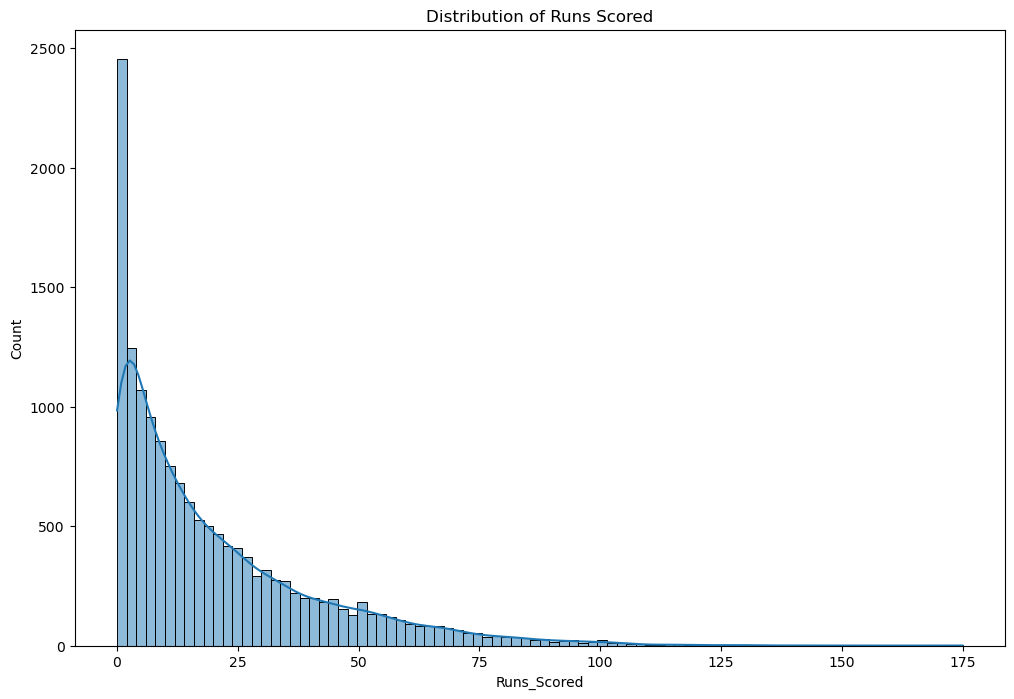

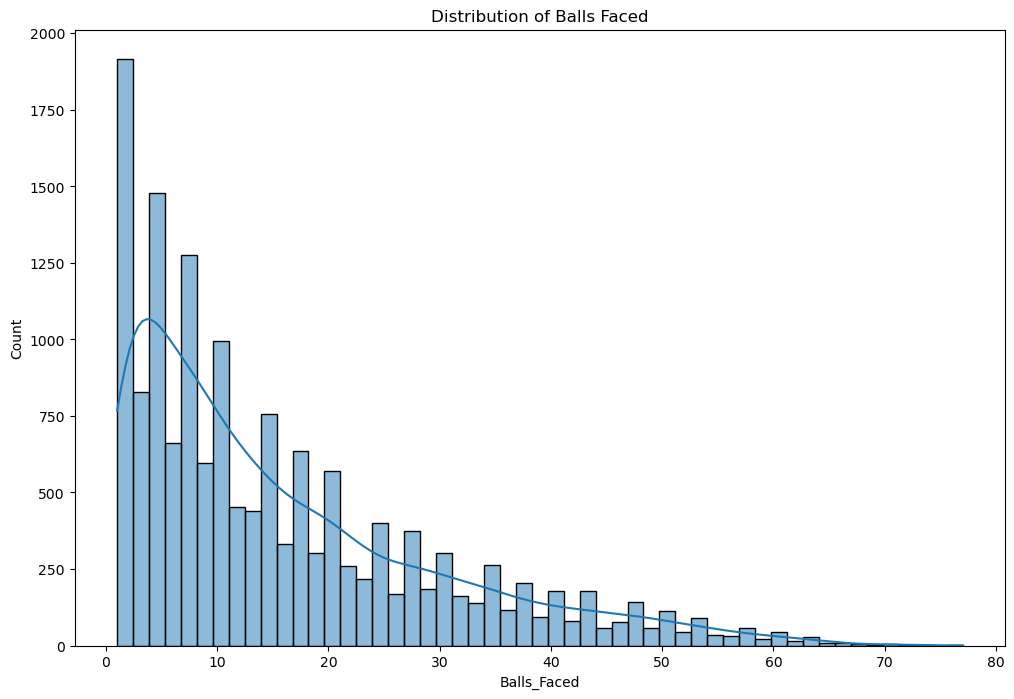

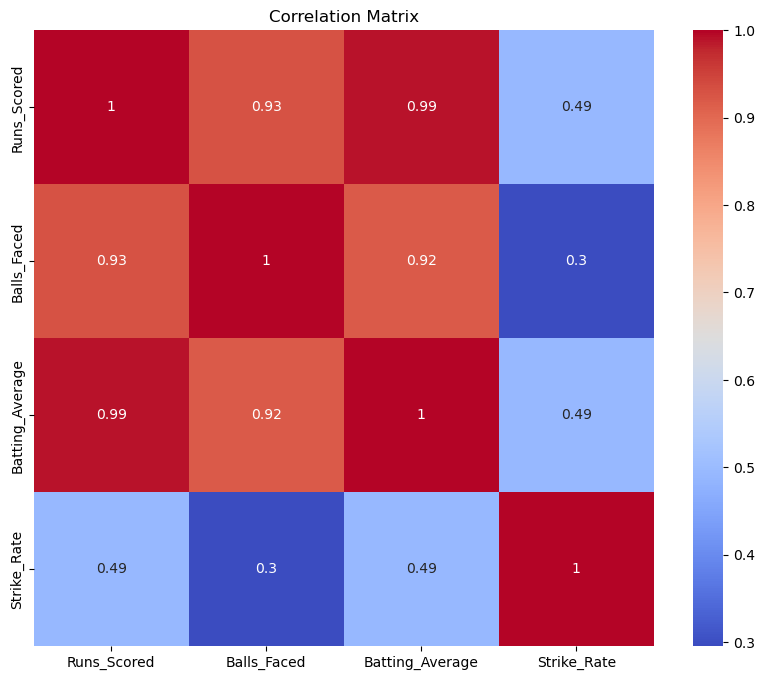

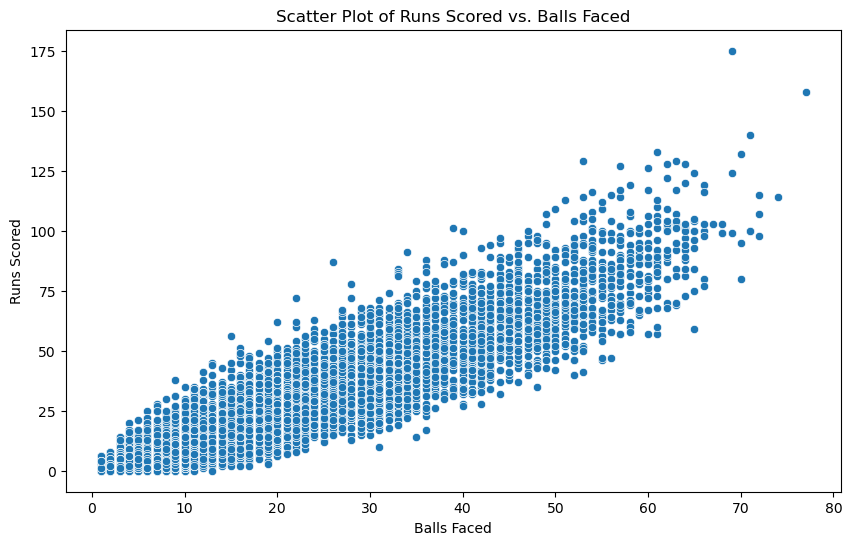

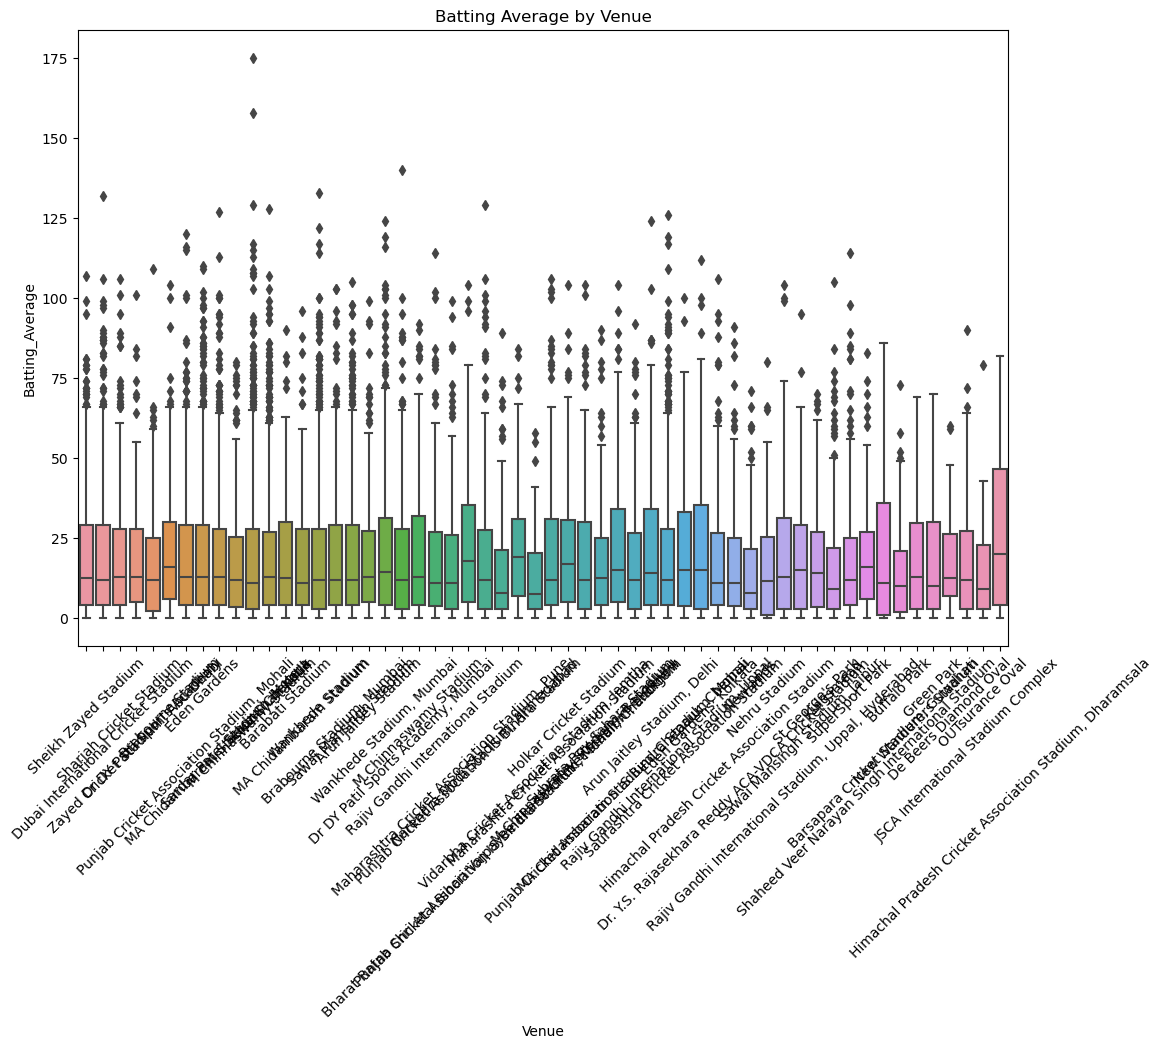

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_bat is already defined in your environment
# If not, you would need to load it from a CSV or another data source

# Basic Descriptive Statistics
print("Descriptive Statistics for Numerical Features:")
print(df_bat[['Runs_Scored', 'Balls_Faced', 'Batting_Average', 'Strike_Rate']].describe())

print("\nCounts for Categorical Features:")
print(df_bat['Venue'].value_counts())
print(df_bat['Team'].value_counts())
print(df_bat['Opposing Team'].value_counts())
print(df_bat['Batsman'].value_counts())

# Distribution of numerical data
plt.figure(figsize=(12, 8))
sns.histplot(df_bat['Runs_Scored'], kde=True)
plt.title('Distribution of Runs Scored')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df_bat['Balls_Faced'], kde=True)
plt.title('Distribution of Balls Faced')
plt.show()

# Correlation Matrix
correlation_matrix = df_bat[['Runs_Scored', 'Balls_Faced', 'Batting_Average', 'Strike_Rate']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for Runs vs Balls Faced
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balls_Faced', y='Runs_Scored', data=df_bat)
plt.title('Scatter Plot of Runs Scored vs. Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.show()

# Box plot for Batting Average by Venue
plt.figure(figsize=(12, 8))
sns.boxplot(x='Venue', y='Batting_Average', data=df_bat)
plt.title('Batting Average by Venue')
plt.xticks(rotation=45)
plt.show()

# Remember to customize plots and analyses based on your specific questions and dataset structure.


Team Performance Summary:
                           Team  Total Runs  Average Runs  Median Runs  \
0           Chennai Super Kings       34334     22.237047         15.0   
1               Deccan Chargers       10885     18.232831         12.0   
2                Delhi Capitals       11764     19.444628         12.0   
3              Delhi Daredevils       23022     18.932566         12.0   
4                 Gujarat Lions        4629     19.449580         11.5   
5                Gujarat Titans        5423     23.889868         17.0   
6               Kings XI Punjab       28541     19.402447         12.0   
7          Kochi Tuskers Kerala        1758     16.128440         11.0   
8         Kolkata Knight Riders       34668     19.356784         12.0   
9          Lucknow Super Giants        4731     19.549587         11.0   
10               Mumbai Indians       37524     20.066310         14.0   
11                Pune Warriors        6040     16.280323         11.0   
12          

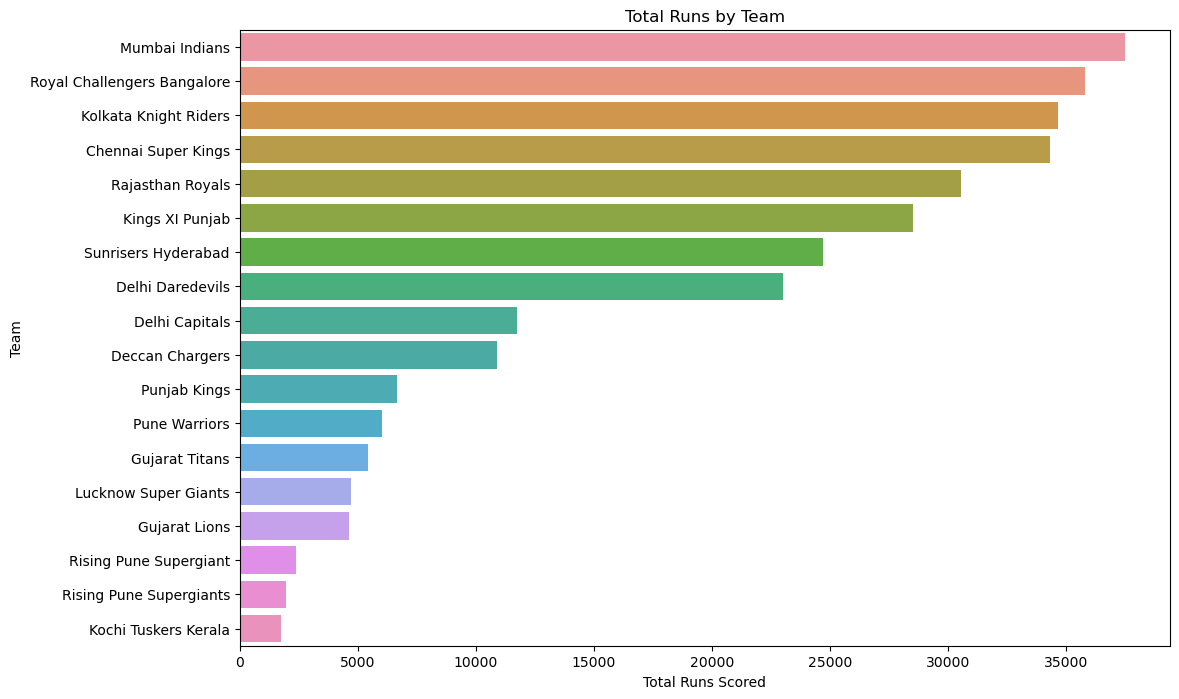

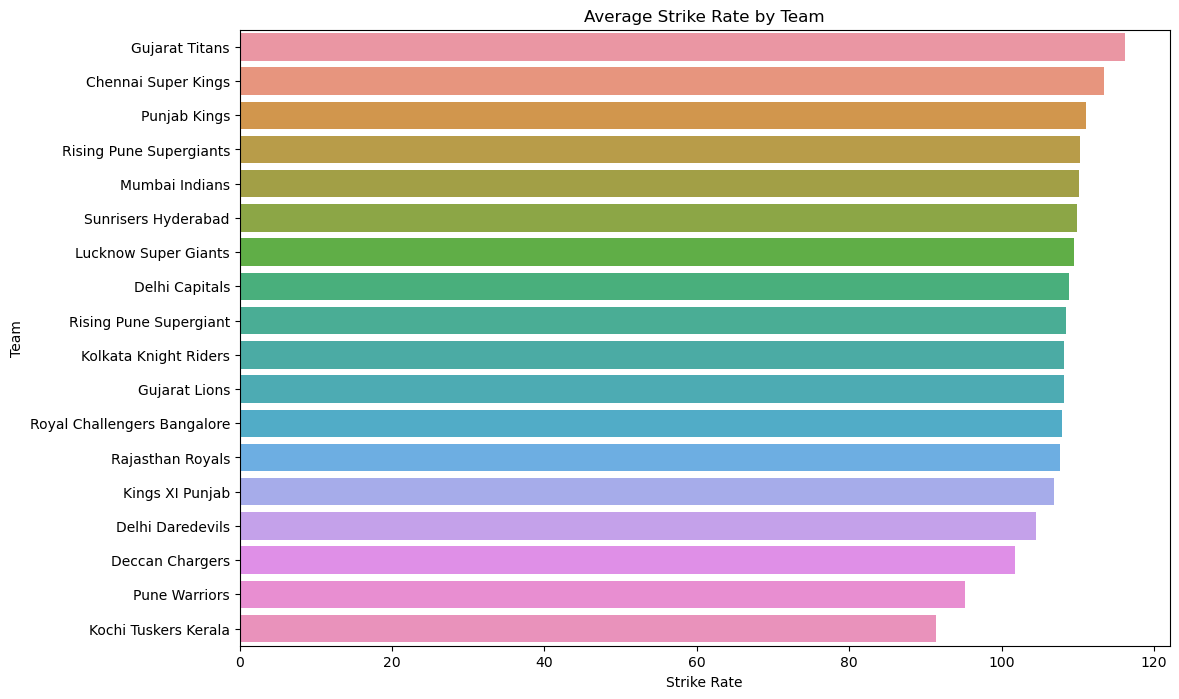

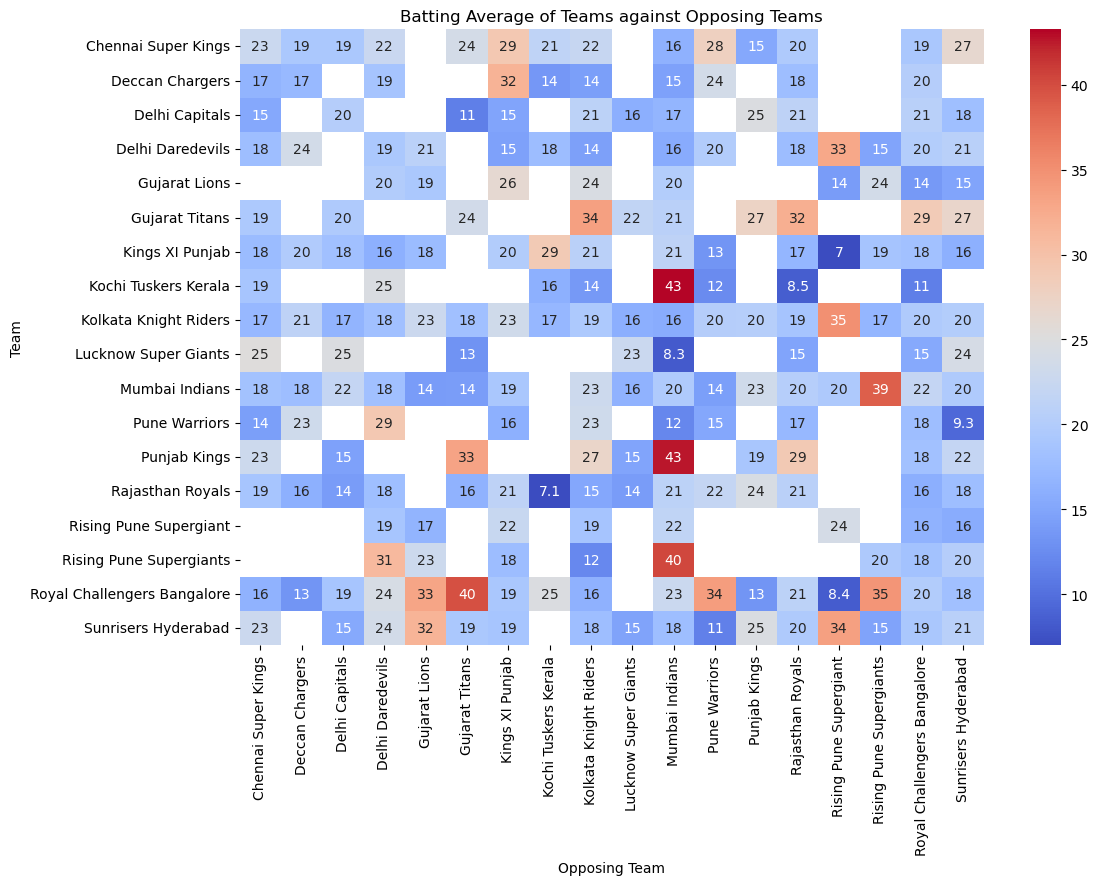

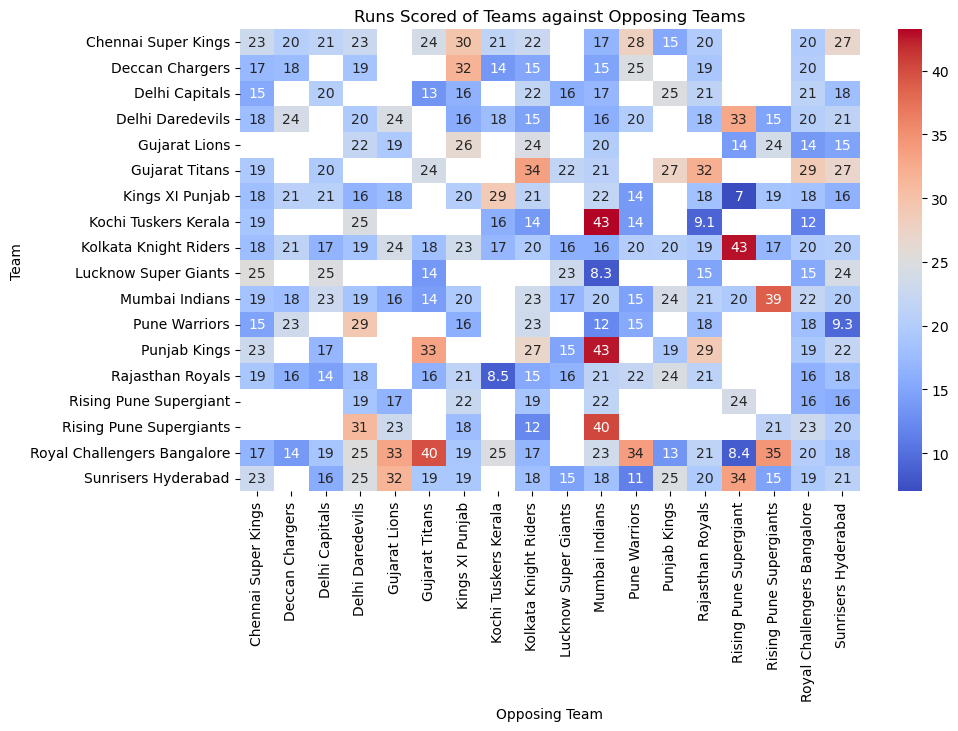

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_bat is already defined in your environment

# Group data by Team and calculate relevant statistics
team_performance = df_bat.groupby('Team').agg({
    'Runs_Scored': ['sum', 'mean', 'median'],
    'Balls_Faced': ['sum', 'mean', 'median'],
    'Batting_Average': ['mean', 'max'],
    'Strike_Rate': ['mean', 'max']
}).reset_index()

team_performance.columns = ['Team', 'Total Runs', 'Average Runs', 'Median Runs', 'Total Balls Faced', 
                            'Average Balls Faced', 'Median Balls Faced', 'Average Batting Average', 
                            'Max Batting Average', 'Average Strike Rate', 'Max Strike Rate']

print("Team Performance Summary:")
print(team_performance)

# Visualizing Total Runs by Team
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Runs', y='Team', data=team_performance.sort_values(by='Total Runs', ascending=False))
plt.title('Total Runs by Team')
plt.xlabel('Total Runs Scored')
plt.ylabel('Team')
plt.show()

# Visualizing Average Strike Rate by Team
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Strike Rate', y='Team', data=team_performance.sort_values(by='Average Strike Rate', ascending=False))
plt.title('Average Strike Rate by Team')
plt.xlabel('Strike Rate')
plt.ylabel('Team')
plt.show()

# Batting Average by Team and Opposing Team
plt.figure(figsize=(12, 8))
team_opp_avg = df_bat.pivot_table(index='Team', columns='Opposing Team', values='Batting_Average', aggfunc='mean')
sns.heatmap(team_opp_avg, annot=True, cmap='coolwarm')
plt.title('Batting Average of Teams against Opposing Teams')
plt.xlabel('Opposing Team')
plt.ylabel('Team')
plt.show()

plt.figure(figsize=(10, 6))
team_opp_avg = df_bat.pivot_table(index='Team', columns='Opposing Team', values='Runs_Scored', aggfunc='mean')
sns.heatmap(team_opp_avg, annot=True, cmap='coolwarm')
plt.title('Runs Scored of Teams against Opposing Teams')
plt.xlabel('Opposing Team')
plt.ylabel('Team')
plt.show()

# Remember to customize plots and analyses based on your specific questions and dataset structure.


Performance Summary Against Each Opposing Team:
                  Team        Opposing Team  Average Runs Scored  \
0  Chennai Super Kings  Chennai Super Kings            22.931408   
1  Chennai Super Kings      Deccan Chargers            20.409091   
2  Chennai Super Kings       Delhi Capitals            21.370370   
3  Chennai Super Kings     Delhi Daredevils            22.636364   
4  Chennai Super Kings       Gujarat Titans            23.714286   

   Total Runs Scored  Average Balls Faced  Average Batting Average  \
0              19056            17.725632                22.632371   
1                449            17.000000                19.227273   
2                577            17.851852                19.277778   
3               1245            17.818182                22.500000   
4                166            13.428571                23.714286   

   Average Strike Rate  
0           115.857844  
1           107.714980  
2           103.395172  
3           115.011819

C:\Users\gsuma\AppData\Local\Temp\ipykernel_3660\1331062941.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = team_opposing_stats.pivot("Team", "Opposing Team", "Average Runs Scored")


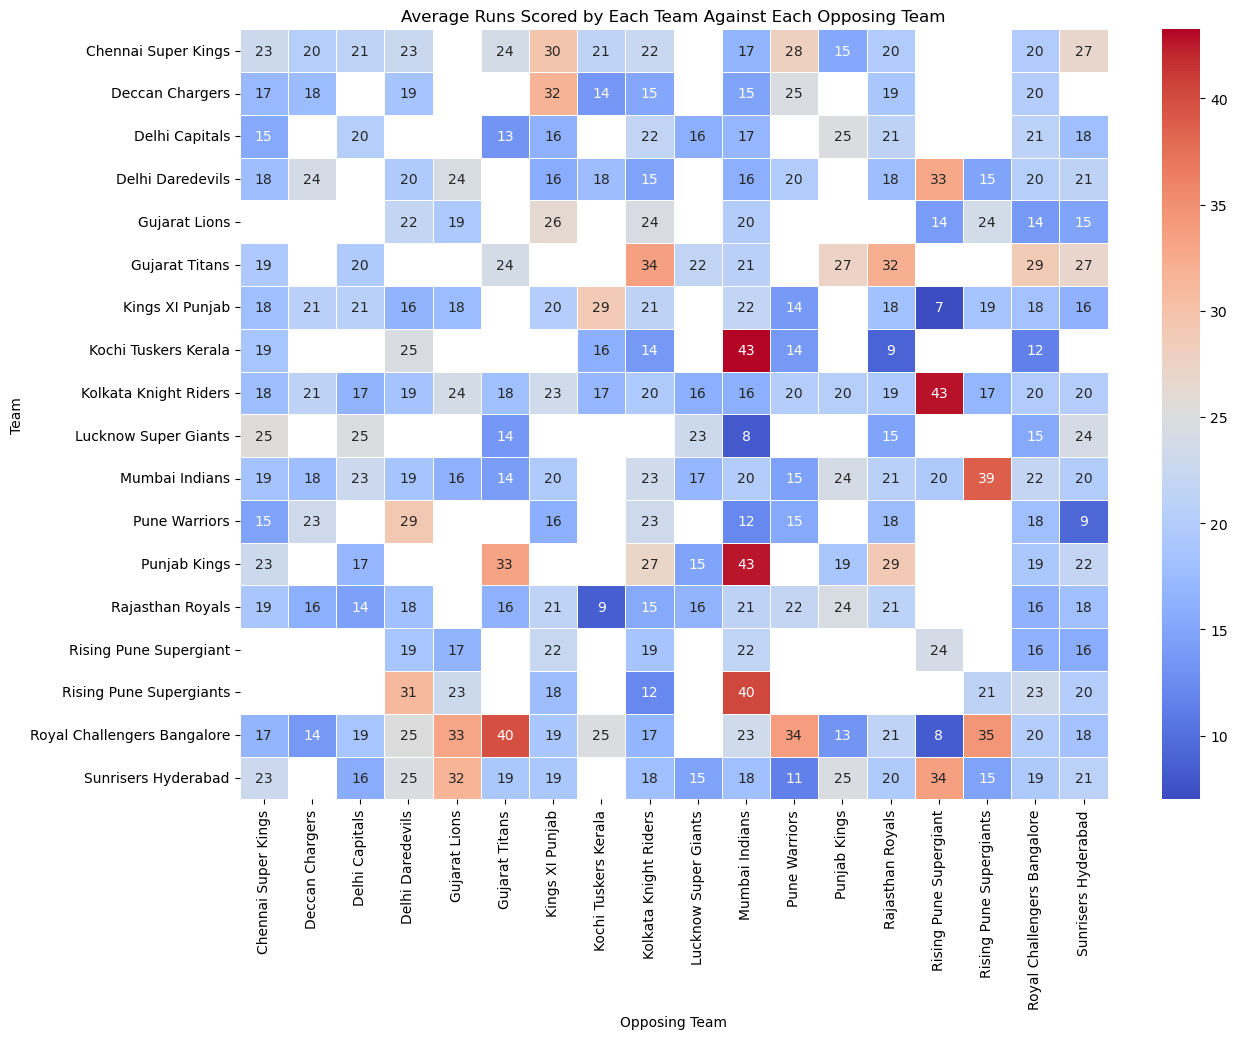

C:\Users\gsuma\AppData\Local\Temp\ipykernel_3660\1331062941.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_strike_rate = team_opposing_stats.pivot("Team", "Opposing Team", "Average Strike Rate")


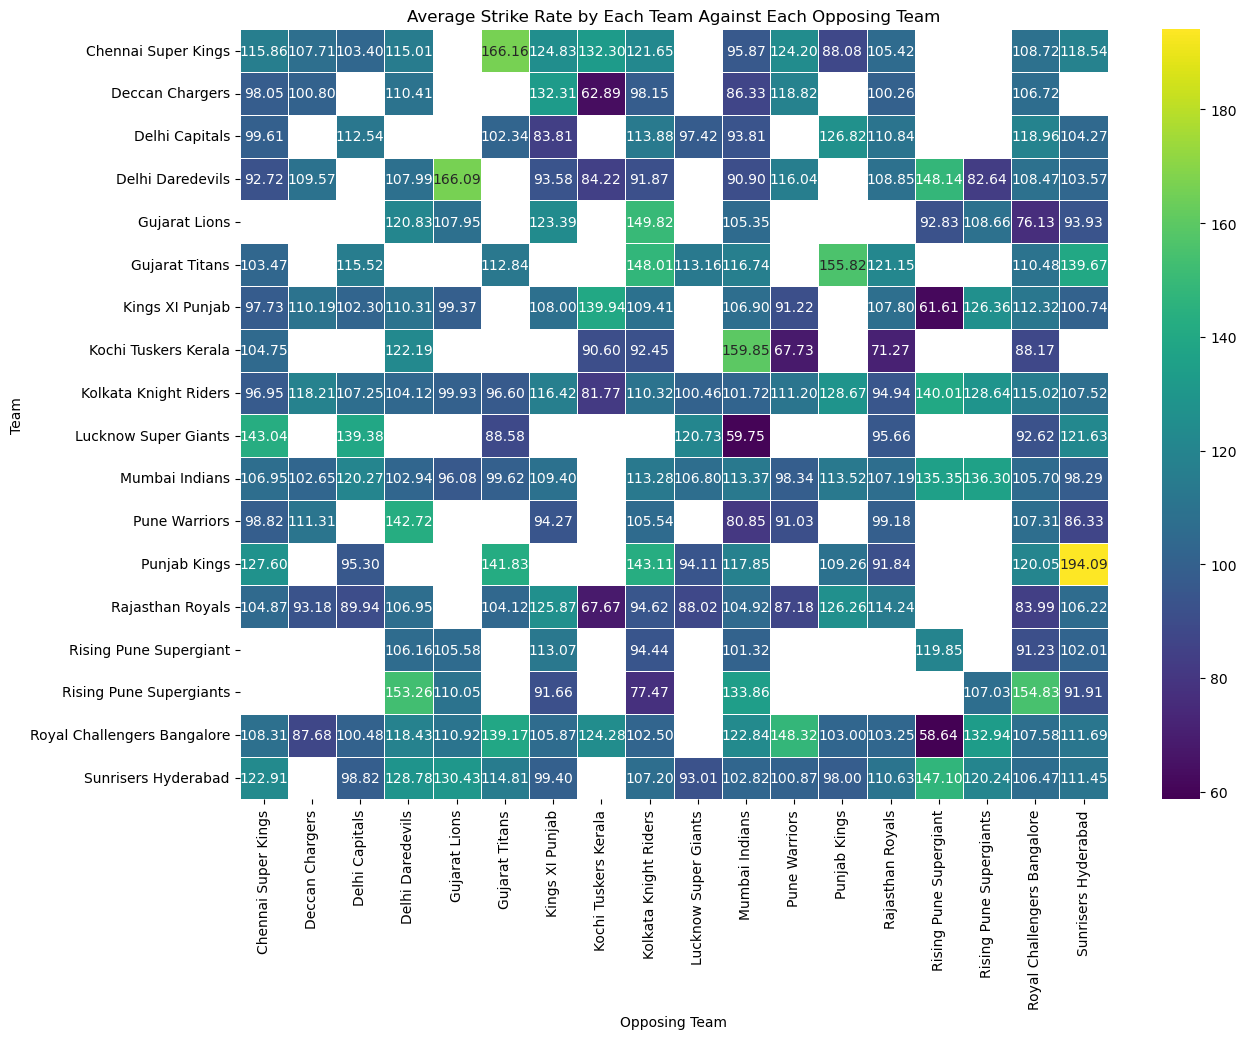

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_bat is already loaded

# Grouping data by Team and Opposing Team to find average performance metrics
team_opposing_stats = df_bat.groupby(['Team', 'Opposing Team']).agg({
    'Runs_Scored': ['mean', 'sum'],
    'Balls_Faced': 'mean',
    'Batting_Average': 'mean',
    'Strike_Rate': 'mean'
}).reset_index()

team_opposing_stats.columns = ['Team', 'Opposing Team', 'Average Runs Scored', 'Total Runs Scored', 
                               'Average Balls Faced', 'Average Batting Average', 'Average Strike Rate']

print("Performance Summary Against Each Opposing Team:")
print(team_opposing_stats.head())

# Visualizing Average Runs Scored by Each Team Against Each Opposing Team
plt.figure(figsize=(14, 10))
pivot_data = team_opposing_stats.pivot("Team", "Opposing Team", "Average Runs Scored")
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Average Runs Scored by Each Team Against Each Opposing Team')
plt.show()

# Visualizing Average Strike Rate by Each Team Against Each Opposing Team
plt.figure(figsize=(14, 10))
pivot_strike_rate = team_opposing_stats.pivot("Team", "Opposing Team", "Average Strike Rate")
sns.heatmap(pivot_strike_rate, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title('Average Strike Rate by Each Team Against Each Opposing Team')
plt.show()

# Remember to adjust the visualizations and analysis based on your specific dataset structure and analysis needs.


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_bat['Batsman'] = le.fit_transform(df_bat['Batsman'])

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from joblib import dump

# Assuming df_bat is your DataFrame and 'Batsman' is a column with categorical names
le = LabelEncoder()
df_bat['Batsman'] = le.fit_transform(df_bat['Batsman'])

# Save the encoder for later use
dump(le, 'batsman_encoder.joblib')


['batsman_encoder.joblib']

In [8]:
import pandas as pd

df_bat['Match Date'] = pd.to_datetime(df_bat['Match Date'])

# Extract features from Match Date
df_bat['Year'] = df_bat['Match Date'].dt.year
df_bat['Month'] = df_bat['Match Date'].dt.month
df_bat['Day'] = df_bat['Match Date'].dt.day

In [9]:
df_bat

,Match Date,Venue,Team,Opposing Team,Batsman,Runs_Scored,Balls_Faced,Dismissals,Batting_Average,Strike_Rate,Year,Month,Day
0,2020-10-01,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,193,11,19,1,11.0,57.894737,2020,10,1
1,2020-10-01,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,234,7,7,1,7.0,100.000000,2020,10,1
2,2020-10-01,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,258,22,13,0,22.0,169.230769,2020,10,1
3,2020-10-01,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,274,0,3,1,0.0,0.000000,2020,10,1
4,2020-10-01,Sheikh Zayed Stadium,Kings XI Punjab,Mumbai Indians,276,17,19,1,17.0,89.473684,2020,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,2021-09-30,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,247,5,5,1,5.0,100.000000,2021,9,30
15396,2021-09-30,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,287,11,12,1,11.0,91.666667,2021,9,30
15397,2021-09-30,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,416,7,11,1,7.0,63.636364,2021,9,30
15398,2021-09-30,Sharjah Cricket Stadium,Sunrisers Hyderabad,Sunrisers Hyderabad,480,17,14,0,17.0,121.428571,2021,9,30


In [10]:
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Match Date       15400 non-null  datetime64[ns]
 1   Venue            15400 non-null  object        
 2   Team             15400 non-null  object        
 3   Opposing Team    15400 non-null  object        
 4   Batsman          15400 non-null  int64         
 5   Runs_Scored      15400 non-null  int64         
 6   Balls_Faced      15400 non-null  int64         
 7   Dismissals       15400 non-null  int64         
 8   Batting_Average  15400 non-null  float64       
 9   Strike_Rate      15400 non-null  float64       
 10  Year             15400 non-null  int64         
 11  Month            15400 non-null  int64         
 12  Day              15400 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 1.5+ MB


In [11]:
df_bat = pd.DataFrame(df_bat)

# Identifying categorical columns (assuming you don't already know)
categorical_cols = df_bat.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding only to categorical columns
df_bat_encoded = pd.get_dummies(df_bat, columns=categorical_cols)

print(df_bat_encoded)

      Match Date  Batsman  Runs_Scored  Balls_Faced  Dismissals  \
0     2020-10-01      193           11           19           1   
1     2020-10-01      234            7            7           1   
2     2020-10-01      258           22           13           0   
3     2020-10-01      274            0            3           1   
4     2020-10-01      276           17           19           1   
...          ...      ...          ...          ...         ...   
15395 2021-09-30      247            5            5           1   
15396 2021-09-30      287           11           12           1   
15397 2021-09-30      416            7           11           1   
15398 2021-09-30      480           17           14           0   
15399 2021-09-30      617           44           47           1   

       Batting_Average  Strike_Rate  Year  Month  Day  ...  \
0                 11.0    57.894737  2020     10    1  ...   
1                  7.0   100.000000  2020     10    1  ...   
2        

In [12]:

df_bat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Columns: 102 entries, Match Date to Opposing Team_Sunrisers Hyderabad
dtypes: datetime64[ns](1), float64(2), int64(7), uint8(92)
memory usage: 2.5 MB


In [13]:
# Display data types of all columns
print(df_bat_encoded.dtypes)


Match Date                                   datetime64[ns]
Batsman                                               int64
Runs_Scored                                           int64
Balls_Faced                                           int64
Dismissals                                            int64
                                                  ...      
Opposing Team_Rajasthan Royals                        uint8
Opposing Team_Rising Pune Supergiant                  uint8
Opposing Team_Rising Pune Supergiants                 uint8
Opposing Team_Royal Challengers Bangalore             uint8
Opposing Team_Sunrisers Hyderabad                     uint8
Length: 102, dtype: object


In [14]:
df_bat_encoded.columns

Index(['Match Date', 'Batsman', 'Runs_Scored', 'Balls_Faced', 'Dismissals',
       'Batting_Average', 'Strike_Rate', 'Year', 'Month', 'Day',
       ...
       'Opposing Team_Kolkata Knight Riders',
       'Opposing Team_Lucknow Super Giants', 'Opposing Team_Mumbai Indians',
       'Opposing Team_Pune Warriors', 'Opposing Team_Punjab Kings',
       'Opposing Team_Rajasthan Royals',
       'Opposing Team_Rising Pune Supergiant',
       'Opposing Team_Rising Pune Supergiants',
       'Opposing Team_Royal Challengers Bangalore',
       'Opposing Team_Sunrisers Hyderabad'],
      dtype='object', length=102)

In [15]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Set option to display all columns (98 in your case)
pd.set_option('display.max_columns', 98)

# Print the data types of all columns
print(df_bat_encoded.dtypes)


Match Date                                   datetime64[ns]
Batsman                                               int64
Runs_Scored                                           int64
Balls_Faced                                           int64
Dismissals                                            int64
                                                  ...      
Opposing Team_Rajasthan Royals                        uint8
Opposing Team_Rising Pune Supergiant                  uint8
Opposing Team_Rising Pune Supergiants                 uint8
Opposing Team_Royal Challengers Bangalore             uint8
Opposing Team_Sunrisers Hyderabad                     uint8
Length: 102, dtype: object


In [16]:
# Dropping the 'Match Date' column
df_bat_encoded = df_bat_encoded.drop(columns=['Match Date'])


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming 'df_bat_encoded' is your DataFrame after handling non-numeric columns
# Drop the target variable 'Runs_Scored' if it should not be scaled, or include it if it should be
scaled_features = scaler.fit_transform(df_bat_encoded.drop(['Runs_Scored'], axis=1))

# You can turn the scaled features back into a DataFrame if needed:
scaled_df = pd.DataFrame(scaled_features, columns=df_bat_encoded.drop(['Runs_Scored'], axis=1).columns)


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `df` is your final dataset after merging batting_metrics and bowling_metrics and encoding categorical variables

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_bat_encoded.drop(['Runs_Scored'], axis=1))

# Apply PCA
pca = PCA(n_components=5)  # 'm' can be the number of components you want to keep
principalComponents = pca.fit_transform(scaled_features)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principalComponents, columns=[f'Principal Component {i}' for i in range(1, 5+1)])

# You can also examine the explained variance ratio to decide how many components to keep
print(pca.explained_variance_ratio_)


[0.03059871 0.02401328 0.02313317 0.02289433 0.02270758]


In [19]:
X_train = df_bat_encoded.drop(['Runs_Scored'], axis=1)
y_train = df_bat_encoded['Runs_Scored']

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your features and target variable respectively
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# To map these importances to the correct feature name:
feature_names = X_train.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)

print(feature_importances)


                                                    importance
Batting_Average                                       0.984146
Dismissals                                            0.015421
Balls_Faced                                           0.000220
Strike_Rate                                           0.000112
Opposing Team_Royal Challengers Bangalore             0.000025
...                                                        ...
Venue_Newlands                                        0.000000
Venue_OUTsurance Oval                                 0.000000
Venue_Punjab Cricket Association IS Bindra Stad...    0.000000
Venue_Barsapara Cricket Stadium, Guwahati             0.000000
Venue_Brabourne Stadium                               0.000000

[100 rows x 1 columns]


In [21]:
# Filter and print features with importance less than 0.000001
low_importance_features = feature_importances[feature_importances['importance'] > 0.000001]
print(low_importance_features)


                                               importance
Batting_Average                                  0.984146
Dismissals                                       0.015421
Balls_Faced                                      0.000220
Strike_Rate                                      0.000112
Opposing Team_Royal Challengers Bangalore        0.000025
Year                                             0.000016
Month                                            0.000010
Day                                              0.000008
Venue_Sardar Patel Stadium, Motera               0.000006
Team_Kolkata Knight Riders                       0.000005
Venue_M Chinnaswamy Stadium                      0.000005
Team_Kings XI Punjab                             0.000004
Batsman                                          0.000004
Team_Royal Challengers Bangalore                 0.000004
Team_Lucknow Super Giants                        0.000003
Opposing Team_Lucknow Super Giants               0.000002
Venue_Dr DY Pa

In [22]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)

print(feature_importances)


                                                  importance
Batting_Average                                     0.929139
Dismissals                                          0.068574
Venue_Arun Jaitley Stadium                          0.000524
Balls_Faced                                         0.000275
Venue_Punjab Cricket Association Stadium, Mohali    0.000174
...                                                      ...
Team_Gujarat Lions                                  0.000000
Venue_Saurashtra Cricket Association Stadium        0.000000
Venue_Sawai Mansingh Stadium, Jaipur                0.000000
Venue_Sharjah Cricket Stadium                       0.000000
Opposing Team_Sunrisers Hyderabad                   0.000000

[100 rows x 1 columns]


In [23]:
low_importance_features = feature_importances[feature_importances['importance'] > 0.00001]
print(low_importance_features)

                                                    importance
Batting_Average                                       0.929139
Dismissals                                            0.068574
Venue_Arun Jaitley Stadium                            0.000524
Balls_Faced                                           0.000275
Venue_Punjab Cricket Association Stadium, Mohali      0.000174
Opposing Team_Deccan Chargers                         0.000144
Venue_Eden Gardens, Kolkata                           0.000106
Opposing Team_Rising Pune Supergiant                  0.000099
Team_Sunrisers Hyderabad                              0.000093
Team_Lucknow Super Giants                             0.000088
Opposing Team_Rising Pune Supergiants                 0.000066
Venue_MA Chidambaram Stadium, Chepauk                 0.000065
Team_Kings XI Punjab                                  0.000057
Venue_M.Chinnaswamy Stadium                           0.000056
Team_Pune Warriors                                    0

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd

# Assuming df_bat_encoded is your DataFrame and 'Runs_Scored' is the target variable
X = df_bat_encoded.drop('Runs_Scored', axis=1)
y = df_bat_encoded['Runs_Scored']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

# Dictionary to hold r2 scores
scores = {}

# Loop through models, fit, predict, and store scores
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict on test set
    scores[model_name] = r2_score(y_test, y_pred)  # Calculate R2 score

# Convert scores to DataFrame for nicer display
scores_df = pd.DataFrame(scores.items(), columns=['Model', 'R2 Score'])

print(scores_df)


                       Model  R2 Score
0           LinearRegression  0.987307
1                      Lasso  0.986586
2                      Ridge  0.987309
3      DecisionTreeRegressor  0.999872
4      RandomForestRegressor  0.999847
5  GradientBoostingRegressor  0.999793


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import numpy as np

# Assuming df_bat_encoded is your DataFrame and 'Runs_Scored' is the target variable
X = df_bat_encoded.drop('Runs_Scored', axis=1)
y = df_bat_encoded['Runs_Scored']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

# Dictionary to hold scores
scores = {}

# Loop through models, fit, predict, and store scores
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict on test set
    scores[model_name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Convert scores to DataFrame for nicer display
scores_df = pd.DataFrame(scores).T
scores_df.reset_index(inplace=True)
scores_df.rename(columns={"index": "Model"}, inplace=True)

print(scores_df)


                       Model  R2 Score       MSE       MAE      RMSE
0           LinearRegression  0.987307  5.470906  1.220495  2.338997
1                      Lasso  0.986586  5.781552  1.011376  2.404486
2                      Ridge  0.987309  5.469988  1.220161  2.338801
3      DecisionTreeRegressor  0.999760  0.103571  0.016558  0.321825
4      RandomForestRegressor  0.999862  0.059501  0.017695  0.243928
5  GradientBoostingRegressor  0.999793  0.089228  0.098377  0.298711


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import numpy as np

# Assuming df_bat_encoded is your DataFrame and 'Runs_Scored' is the target variable
X = df_bat_encoded.drop(labels=['Runs_Scored', 'Batting_Average'], axis=1)
y = df_bat_encoded['Runs_Scored']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

# Dictionary to hold scores
scores = {}

# Loop through models, fit, predict, and store scores
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict on test set
    scores[model_name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Convert scores to DataFrame for nicer display
scores_df = pd.DataFrame(scores).T
scores_df.reset_index(inplace=True)
scores_df.rename(columns={"index": "Model"}, inplace=True)

print(scores_df)


                       Model  R2 Score        MSE       MAE      RMSE
0           LinearRegression  0.916803  35.858870  4.130371  5.988228
1                      Lasso  0.916014  36.199355  4.116379  6.016590
2                      Ridge  0.916808  35.857079  4.129829  5.988078
3      DecisionTreeRegressor  0.997342   1.145779  0.231494  1.070411
4      RandomForestRegressor  0.999437   0.242848  0.121711  0.492796
5  GradientBoostingRegressor  0.998183   0.783303  0.610181  0.885044


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import numpy as np

# Assuming df_bat_encoded is your DataFrame and 'Runs_Scored' is the target variable
X = df_bat_encoded.drop(labels=['Runs_Scored', 'Batting_Average','Strike_Rate','Year', 'Month', 'Day'], axis=1)
y = df_bat_encoded['Runs_Scored']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

# Dictionary to hold scores
scores = {}

# Loop through models, fit, predict, and store scores
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict on test set
    scores[model_name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Convert scores to DataFrame for nicer display
scores_df = pd.DataFrame(scores).T
scores_df.reset_index(inplace=True)
scores_df.rename(columns={"index": "Model"}, inplace=True)

print(scores_df)


                       Model  R2 Score         MSE       MAE       RMSE
0           LinearRegression  0.870731   55.716686  5.293132   7.464361
1                      Lasso  0.865236   58.085043  5.313315   7.621354
2                      Ridge  0.870759   55.704864  5.291518   7.463569
3      DecisionTreeRegressor  0.742072  111.170781  7.074811  10.543756
4      RandomForestRegressor  0.855995   62.068132  5.343269   7.878333
5  GradientBoostingRegressor  0.874423   54.125370  5.095255   7.356995
